Natural disasters have a profound impact on human societies, economies, and environments. Understanding the patterns and consequences of these events can help in better preparedness and response strategies. In this notebook, we will explore a comprehensive dataset of global disasters to uncover insights and trends. If you find this analysis useful, please consider upvoting it.

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
#loading the dataset
df = pd.read_csv("dataset.csv")
df.head()

,DisNo.,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Region,Origin,...,No. Affected,No. Homeless,Total Affected,Insured Damage,"Insured Damage, Adjusted",Total Damage,"Total Damage, Adjusted",CPI,Entry Date,Last Update
0,1999-9388-DJI,Natural,Climatological,Drought,Drought,DJI,Djibouti,Sub-Saharan Africa,Africa,NaN,...,100000.0,NaN,100000.0,NaN,NaN,NaN,NaN,58.111474,01-03-2006,25-09-2023
1,1999-9388-SDN,Natural,Climatological,Drought,Drought,SDN,Sudan,Northern Africa,Africa,NaN,...,2000000.0,NaN,2000000.0,NaN,NaN,NaN,NaN,56.514291,08-03-2006,25-09-2023
2,1999-9388-SOM,Natural,Climatological,Drought,Drought,SOM,Somalia,Sub-Saharan Africa,Africa,NaN,...,1200000.0,NaN,1200000.0,NaN,NaN,NaN,NaN,56.514291,08-03-2006,25-09-2023
3,2000-0001-AGO,Technological,Transport,Road,Road,AGO,Angola,Sub-Saharan Africa,Africa,NaN,...,NaN,NaN,11.0,NaN,NaN,NaN,NaN,56.514291,27-10-2004,25-09-2023
4,2000-0002-AGO,Natural,Hydrological,Flood,Riverine flood,AGO,Angola,Sub-Saharan Africa,Africa,Heavy rain,...,70000.0,NaN,70000.0,NaN,NaN,10000.0,17695.0,56.514291,03-02-2005,25-09-2023


### Data Overview
Let's take a quick look at the structure of the dataset and understand the types of data we are dealing with.

In [3]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15784 entries, 0 to 15783
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DisNo.                    15784 non-null  object 
 1   Disaster Group            15784 non-null  object 
 2   Disaster Subgroup         15784 non-null  object 
 3   Disaster Type             15784 non-null  object 
 4   Disaster Subtype          15784 non-null  object 
 5   ISO                       15784 non-null  object 
 6   Country                   15784 non-null  object 
 7   Subregion                 15784 non-null  object 
 8   Region                    15784 non-null  object 
 9   Origin                    3955 non-null   object 
 10  Magnitude                 3378 non-null   float64
 11  Magnitude Scale           9892 non-null   object 
 12  Latitude                  1815 non-null   float64
 13  Longitude                 1815 non-null   float64
 14  River 

### Data Cleaning
Before diving into the analysis, we need to clean the data. This includes handling missing values, converting date columns to appropriate formats, and ensuring numerical columns are correctly typed.

In [4]:
# Check for missing values in the dataset
df.isnull().sum()

DisNo.                          0
Disaster Group                  0
Disaster Subgroup               0
Disaster Type                   0
Disaster Subtype                0
ISO                             0
Country                         0
Subregion                       0
Region                          0
Origin                      11829
Magnitude                   12406
Magnitude Scale              5892
Latitude                    13969
Longitude                   13969
River Basin                 14572
Start Year                      0
Start Month                    69
Start Day                    1509
End Year                        0
End Month                     162
End Day                      1442
Total Deaths                 3129
No. Injured                  9994
No. Affected                 8612
No. Homeless                14460
Total Affected               4102
Insured Damage              15089
Insured Damage, Adjusted    15090
Total Damage                12658
Total Damage, 

In [5]:
# Convert date columns to datetime format
df['Entry Date'] = pd.to_datetime(df['Entry Date'], errors='coerce')
df['Last Update'] = pd.to_datetime(df['Last Update'], errors='coerce')

C:\Users\PARAM\AppData\Local\Temp\ipykernel_4352\2838889772.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Last Update'] = pd.to_datetime(df['Last Update'], errors='coerce')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15784 entries, 0 to 15783
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DisNo.                    15784 non-null  object        
 1   Disaster Group            15784 non-null  object        
 2   Disaster Subgroup         15784 non-null  object        
 3   Disaster Type             15784 non-null  object        
 4   Disaster Subtype          15784 non-null  object        
 5   ISO                       15784 non-null  object        
 6   Country                   15784 non-null  object        
 7   Subregion                 15784 non-null  object        
 8   Region                    15784 non-null  object        
 9   Origin                    3955 non-null   object        
 10  Magnitude                 3378 non-null   float64       
 11  Magnitude Scale           9892 non-null   object        
 12  Latitude          

In [7]:
# Handle missing values
df.fillna(0, inplace=True)
df.isnull().sum()

C:\Users\PARAM\AppData\Local\Temp\ipykernel_4352\3473941581.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df.fillna(0, inplace=True)


DisNo.                      0
Disaster Group              0
Disaster Subgroup           0
Disaster Type               0
Disaster Subtype            0
ISO                         0
Country                     0
Subregion                   0
Region                      0
Origin                      0
Magnitude                   0
Magnitude Scale             0
Latitude                    0
Longitude                   0
River Basin                 0
Start Year                  0
Start Month                 0
Start Day                   0
End Year                    0
End Month                   0
End Day                     0
Total Deaths                0
No. Injured                 0
No. Affected                0
No. Homeless                0
Total Affected              0
Insured Damage              0
Insured Damage, Adjusted    0
Total Damage                0
Total Damage, Adjusted      0
CPI                         0
Entry Date                  0
Last Update                 0
dtype: int

### Exploratory Data Analysis
Let's explore the data to uncover interesting patterns and insights.

In [8]:
#counts the number of occurrence of each disaster
disaster_counts = df.groupby('Disaster Type').size()
disaster_counts

Disaster Type
Air                                  430
Animal incident                        1
Chemical spill                        23
Collapse (Industrial)                148
Collapse (Miscellaneous)             158
Drought                              408
Earthquake                           665
Epidemic                             894
Explosion (Industrial)               458
Explosion (Miscellaneous)            159
Extreme temperature                  492
Fire (Industrial)                    111
Fire (Miscellaneous)                 421
Flood                               4070
Gas leak                              34
Glacial lake outburst flood            4
Impact                                 1
Industrial accident (General)        102
Infestation                           29
Mass movement (dry)                   13
Mass movement (wet)                  461
Miscellaneous accident (General)     186
Oil spill                              5
Poisoning                             20
Ra

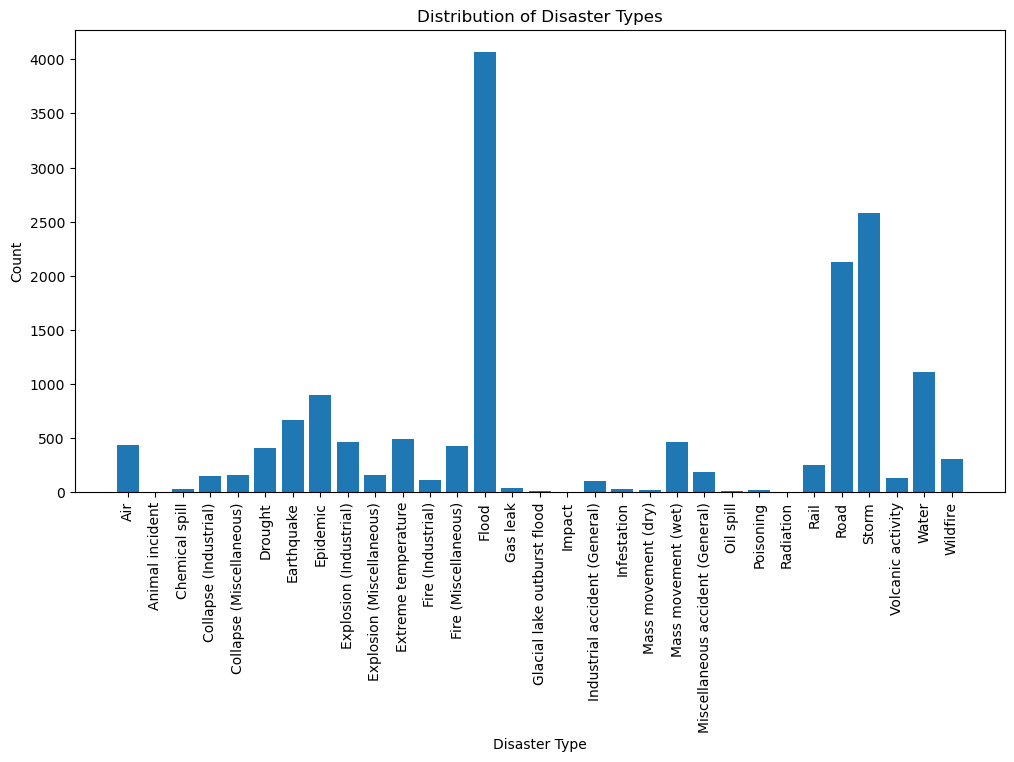

In [9]:
# Create the plot
plt.figure(figsize=(12, 6))
plt.bar(disaster_counts.index, disaster_counts.values)

# Rotate x-axis labels
plt.xticks(rotation=90)

# Add title and labels
plt.title('Distribution of Disaster Types')
plt.xlabel('Disaster Type')
plt.ylabel('Count')

# Show the plot
plt.show()

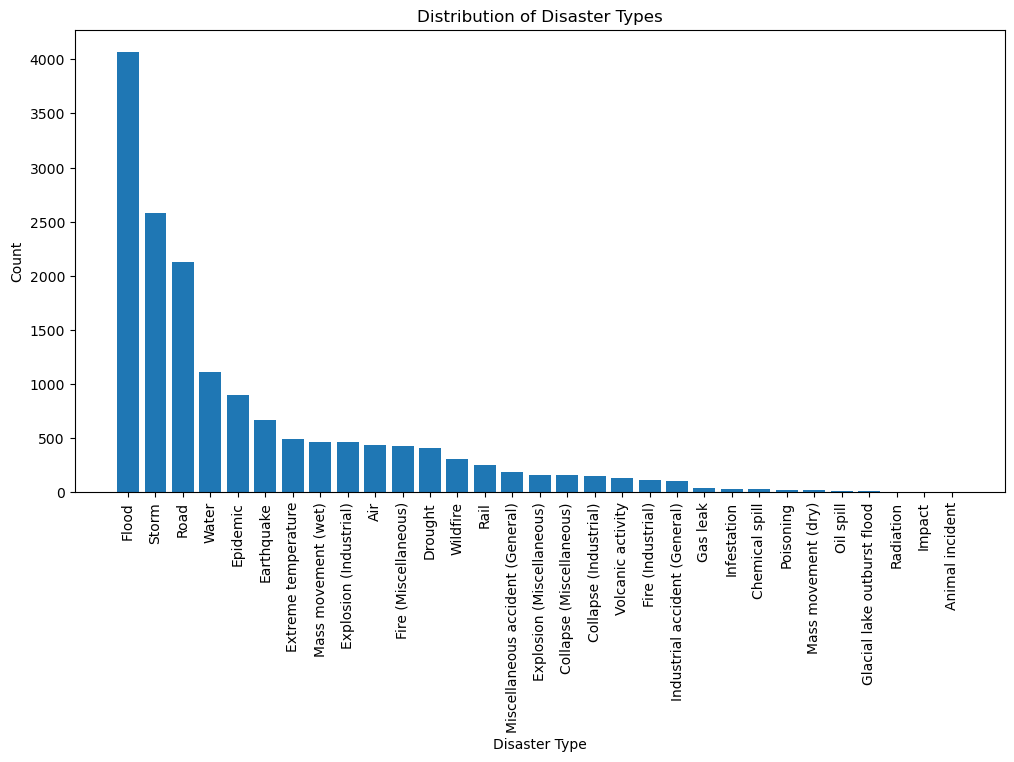

In [10]:
# Count the occurrences of each disaster type
d=disaster_counts.sort_values(ascending=False)
# Create the plot
plt.figure(figsize=(12, 6))
plt.bar(d.index, d.values)

# Rotate x-axis labels
plt.xticks(rotation=90)

# Add title and labels
plt.title('Distribution of Disaster Types')
plt.xlabel('Disaster Type')
plt.ylabel('Count')

# Show the plot
plt.show()

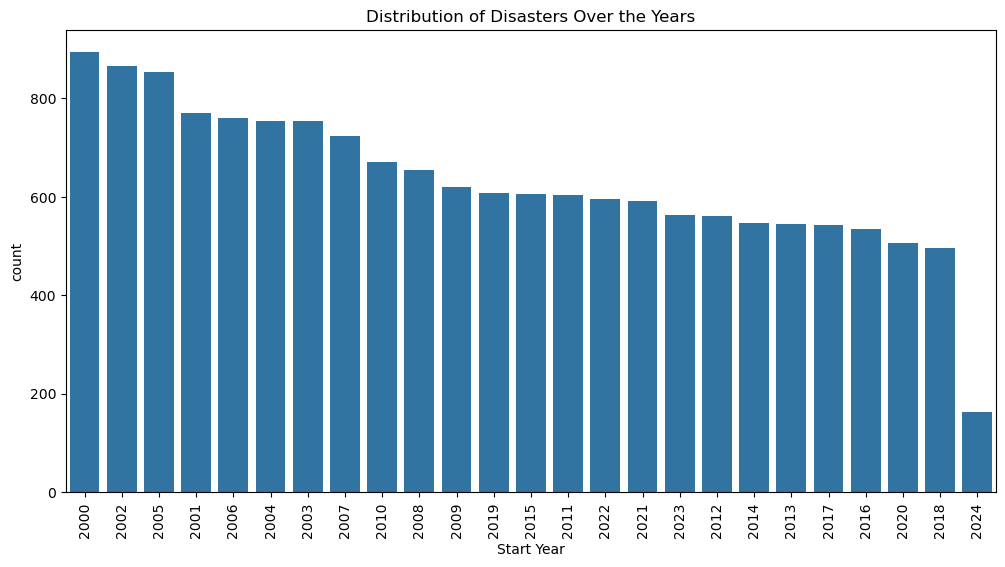

In [11]:
# Distribution of disasters over the years
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Start Year', order=df['Start Year'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Disasters Over the Years')
plt.show()

### Correlation Analysis
Let's examine the correlation between different numerical variables to understand their relationships.

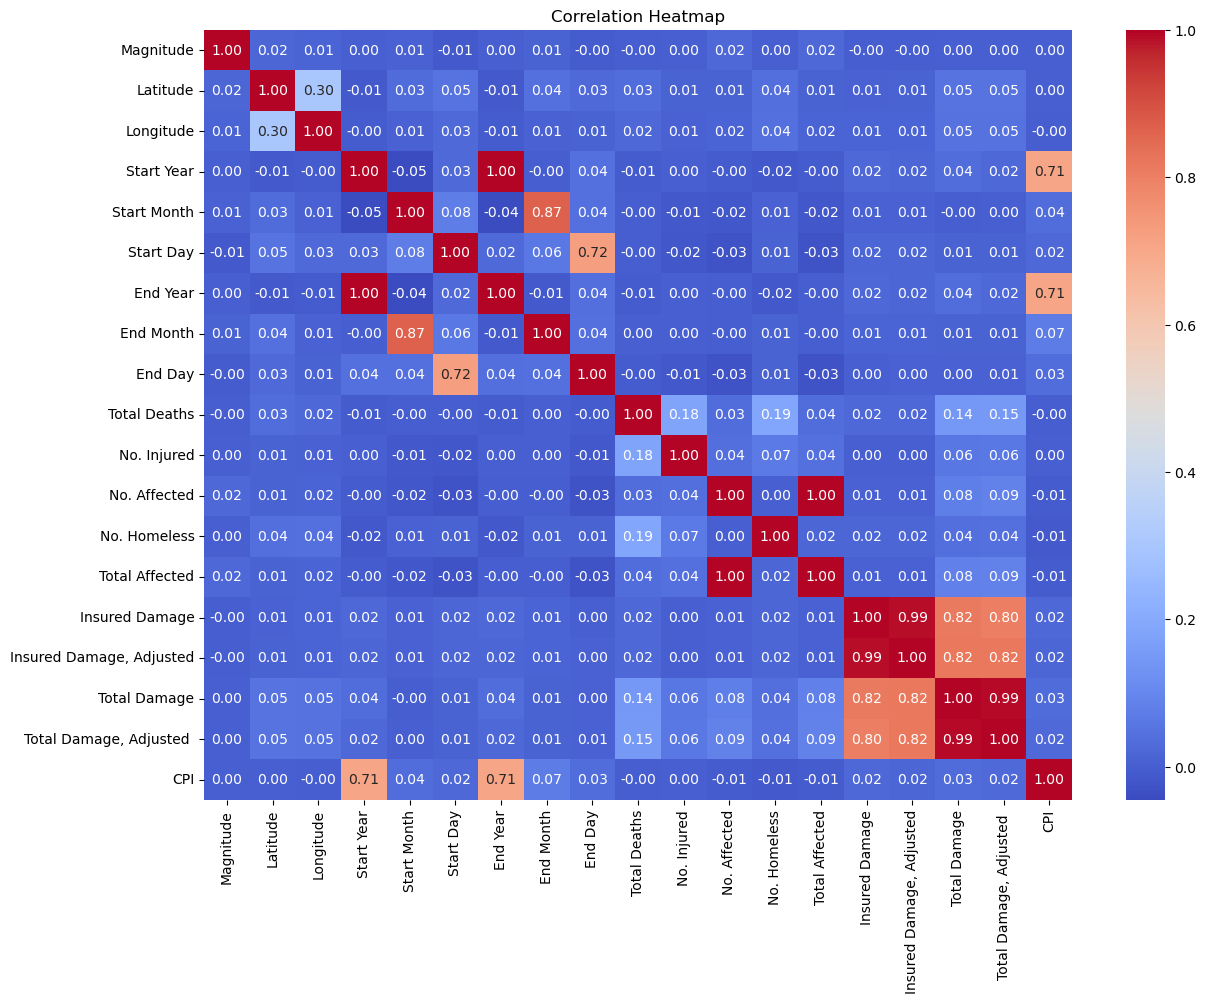

In [12]:
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Prediction Model
Based on the data, it might be useful to predict the type of disaster based on other features. Let's build a simple prediction model to do this.

In [13]:
# Prepare data for prediction
features = ['Start Year', 'End Year', 'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless', 'Total Affected', 'Total Damage']
X = df[features]
y = df['Disaster Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report

C:\Users\PARAM\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\PARAM\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\PARAM\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(0.4448902027027027,
 array([[ 14,   0,   0,   4,   1,   0,   1,   0,   6,   0,   5,   3,   6,
           8,   1,   0,   0,   2,   0,   0,   6,   2,   0,   0,   0,   6,
          41,   3,   0,  28,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   1,   0],
        [  0,   0,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,   0,
           1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   1,   0,   0,   3],
        [  2,   0,   0,   2,   1,   0,   0,   0,   3,   0,   1,   0,   4,
           1,   0,   0,   0,   2,   0,   0,   0,   1,   0,   0,   0,   1,
          15,   1,   0,  11,   0],
        [  2,   0,   0,   0,   0,   0,   2,   0,   4,   1,   1,   1,   4,
           1,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   3,
          20,   0,   0,   2,   0],
        [  1,   0,   0,   0,   0,  50,   0,   1,   0,   0,   5, 

In [14]:
def disaster_analysis(choice):
    if choice == "1":
        # Analyzing which disaster caused the most damage to human life (based on Total Deaths)
        disaster_with_most_deaths = df[['Disaster Type', 'Total Deaths']].dropna()
        disaster_with_most_deaths = disaster_with_most_deaths.groupby('Disaster Type')['Total Deaths'].sum().idxmax()
        total_deaths = df.groupby('Disaster Type')['Total Deaths'].sum().max()
        return f"The disaster type that caused the most damage to human life is '{disaster_with_most_deaths}' with {total_deaths} deaths."

    elif choice == "2":
        # Analyzing which country experienced the most disasters
        most_disasters_country = df['Country'].value_counts().idxmax()
        disaster_count = df['Country'].value_counts().max()
        return f"The country that experienced the most disasters is {most_disasters_country} with {disaster_count} disasters."
    
    elif choice == "3":
        # Analyzing which country had the most affected population (Total Affected)
        most_affected_country = df[['Country', 'Total Affected']].dropna()
        most_affected_country = most_affected_country.groupby('Country')['Total Affected'].sum().idxmax()
        total_affected = df.groupby('Country')['Total Affected'].sum().max()
        return f"The country with the most affected population is {most_affected_country} with {total_affected} people affected."

    elif choice == "4":
        # Analyzing which year had the most disasters
        year_with_most_disasters = df['Start Year'].value_counts().idxmax()
        disaster_count = df['Start Year'].value_counts().max()
        return f"The year with the most disasters was {year_with_most_disasters} with {disaster_count} disasters."

    else:
        return "Invalid choice. Please select a number between 1 and 5."

# Ask user for input
print("Disaster Analysis Options:")
print("1. Disaster type with most deaths")
print("2. Country with most disasters")
print("3. Country with most affected population")
print("4. Year with most disasters")

user_choice = input("Enter your choice (1-4): ")

# Run the analysis based on user input
result = disaster_analysis(user_choice)
print(result)

Disaster Analysis Options:
1. Disaster type with most deaths
2. Country with most disasters
3. Country with most affected population
4. Year with most disasters


Enter your choice (1-4):  1


The disaster type that caused the most damage to human life is 'Earthquake' with 788400.0 deaths.
